In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
## Data Loading ##
nfl_draft_raw = pd.read_csv(r"../nfl_draft_2014_2024.csv")
college_passing_raw = pd.read_csv(r"../college_passing_data_v3.csv")
college_rushing_raw = pd.read_csv(r"../college_rushing_data_v3.csv")
college_receiving_raw = pd.read_csv(r"../college_receiving_data_v3.csv")

# nfl_draft_2014_2024.csv

In [3]:
print(nfl_draft_raw.head())

   DraftYear  Rnd  Pick   Tm           Player Pos   Age      To  AP1  PB  ...  \
0       2019    2    51  TEN       A.J. Brown  WR  22.0  2023.0    0   3  ...   
1       2024    1     5  LAC          Joe Alt  OL  21.0     NaN    0   0  ...   
2       2023    6   195  NOR       A.T. Perry  WR  23.0  2023.0    0   0  ...   
3       2024    1     7  TEN        JC Latham  OL  21.0     NaN    0   0  ...   
4       2016    6   213  SFO  Aaron Burbridge  WR  22.0  2016.0    0   0  ...   

   RusAtt  RusYds  RusTD    Rec  RecYds  RecTD  Solo  DefInt  Sk  College/Univ  
0     5.0    70.0    1.0  379.0  5947.0   42.0   4.0     NaN NaN   Mississippi  
1     NaN     NaN    NaN    NaN     NaN    NaN   NaN     NaN NaN    Notre Dame  
2     0.0     0.0    0.0   12.0   246.0    4.0   NaN     NaN NaN   Wake Forest  
3     NaN     NaN    NaN    NaN     NaN    NaN   NaN     NaN NaN       Alabama  
4     0.0     0.0    0.0    7.0    88.0    0.0   9.0     NaN NaN  Michigan St.  

[5 rows x 29 columns]


In [4]:
nfl_draft_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DraftYear     2778 non-null   int64  
 1   Rnd           2778 non-null   int64  
 2   Pick          2778 non-null   int64  
 3   Tm            2778 non-null   object 
 4   Player        2778 non-null   object 
 5   Pos           2778 non-null   object 
 6   Age           2662 non-null   float64
 7   To            2337 non-null   float64
 8   AP1           2778 non-null   int64  
 9   PB            2778 non-null   int64  
 10  St            2778 non-null   int64  
 11  wAV           2337 non-null   float64
 12  DrAV          2212 non-null   float64
 13  G             2337 non-null   float64
 14  Cmp           2337 non-null   float64
 15  PasAtt        2337 non-null   float64
 16  PasYds        2337 non-null   float64
 17  PasTD         2337 non-null   float64
 18  Int           2337 non-null 

In [5]:
## Check missing values
nfl_draft_raw.isnull().sum()

DraftYear          0
Rnd                0
Pick               0
Tm                 0
Player             0
Pos                0
Age              116
To               441
AP1                0
PB                 0
St                 0
wAV              441
DrAV             566
G                441
Cmp              441
PasAtt           441
PasYds           441
PasTD            441
Int              441
RusAtt           441
RusYds           441
RusTD            441
Rec              441
RecYds           441
RecTD            441
Solo            1109
DefInt          2286
Sk              2058
College/Univ      13
dtype: int64

In [20]:
#new_nfl_draft = nfl_draft_raw.groupby(['DraftYear','Pick']).size()
df_gb = nfl_draft_raw.groupby(['DraftYear','Pick']).size().reset_index(name='counts')
display(df_gb)

,DraftYear,Pick,counts
0,2014,1,1
1,2014,2,1
2,2014,3,1
3,2014,4,1
4,2014,5,1
...,...,...,...
2773,2024,253,1
2774,2024,254,1
2775,2024,255,1
2776,2024,256,1


In [21]:
df2 = df_gb.groupby(['DraftYear'],as_index=False).agg({'counts': 'sum'})

,DraftYear,counts
0,2014,251
1,2015,250
2,2016,247
3,2017,249
4,2018,251
5,2019,250
6,2020,252
7,2021,256
8,2022,261
9,2023,255


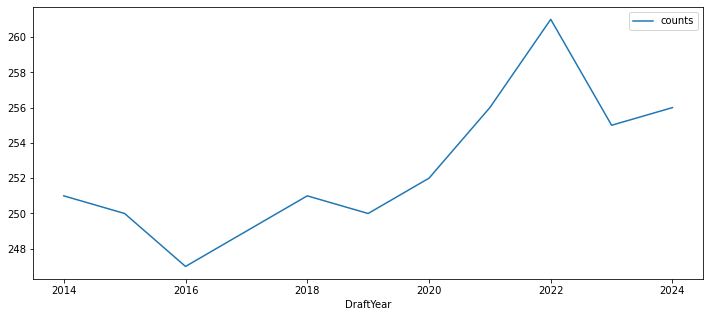

In [45]:
# The number of draft picks per year from 2014 to 2024
df2.plot(kind = 'line', x = 'DraftYear', y = 'counts', figsize=(12, 5))
plt.show()

# college_passing_data_v3.csv
# college_receiving_data_v3.csv
# college_rusing_data_v3.csv

In [27]:
df_merged = college_passing_raw.append(college_receiving_raw, ignore_index=True)

In [28]:
df_merged2 = df_merged.append(college_rushing_raw, ignore_index=True)

In [29]:
## Check missing values
df_merged2.isnull().sum()

Season           0
Rank           162
Player           0
School           0
Power5           0
Conference       0
Division         0
Cl               0
Pos             80
G                0
Pass Att      9127
Pass Com      9127
Int           9127
Pass TD       9127
Pass Yds      9127
Rec           7637
Rec Yds       7637
Rec TD        7637
Rush          7550
Rush TD       7550
Rush Yds      7550
dtype: int64

In [30]:
df_merged2.describe()

,Season,Rank,G,Pass Att,Pass Com,Int,Pass TD,Pass Yds,Rec,Rec Yds,Rec TD,Rush,Rush TD,Rush Yds
count,12157.000000,11995.000000,12157.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,4520.000000,4520.000000,4520.000000,4607.000000,4607.000000,4607.000000
mean,2017.741384,99.129054,11.231718,261.984488,157.906601,6.964686,14.252145,1941.168977,49.558850,696.131858,5.399336,140.237031,7.066204,734.390927
std,3.271962,68.807207,2.099966,133.932033,86.975429,3.914370,9.603520,1079.359539,18.638573,263.069934,3.287513,55.564554,4.491871,325.078583
min,2013.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.000000,1.000000,15.000000,0.000000,15.000000,0.000000,143.000000
25%,2015.000000,46.000000,10.000000,172.000000,96.000000,4.000000,7.000000,1181.000000,37.000000,539.000000,3.000000,101.000000,4.000000,509.000000
50%,2018.000000,91.000000,12.000000,272.000000,159.000000,7.000000,13.000000,1944.500000,47.000000,655.000000,5.000000,132.000000,6.000000,655.000000
75%,2021.000000,138.000000,13.000000,358.000000,220.000000,10.000000,20.000000,2694.750000,60.000000,833.000000,7.000000,170.000000,9.000000,890.000000
max,2024.000000,400.000000,16.000000,714.000000,505.000000,32.000000,62.000000,5967.000000,158.000000,1902.000000,24.000000,413.000000,41.000000,2587.000000


In [32]:
df_gb = df_merged2.groupby(['Pos']).size()

<AxesSubplot:xlabel='Pos'>

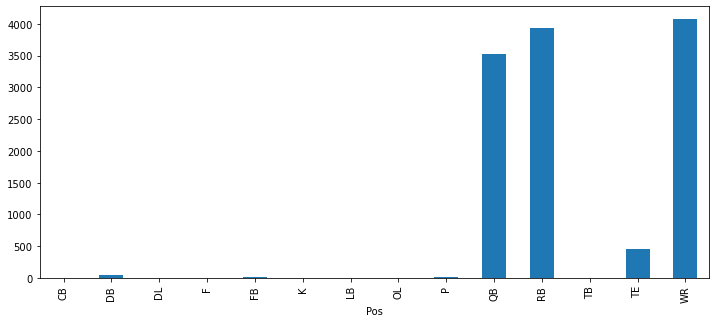

In [46]:
df_gb.plot(kind = 'bar', figsize=(12, 5))

In [ ]:
# Number of entries per conference

<AxesSubplot:xlabel='Conference'>

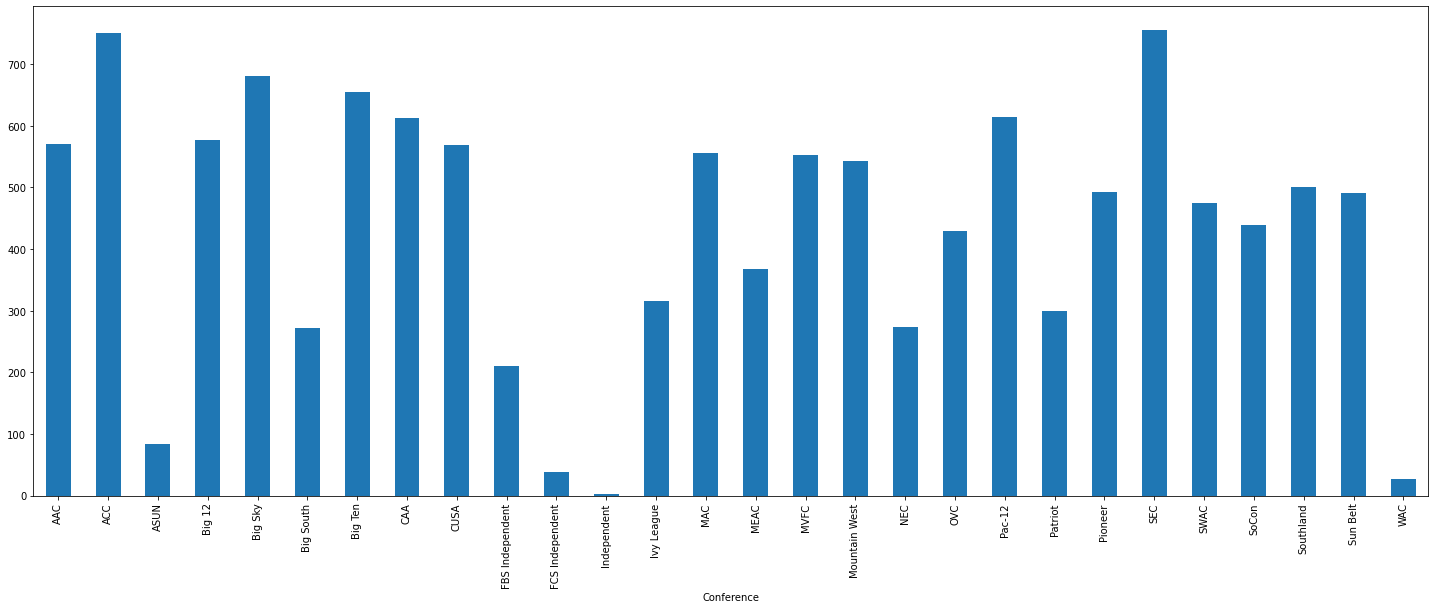

In [52]:
df_conf = df_merged2.groupby(['Conference']).size()
df_conf.plot(kind = 'bar', figsize=(25, 9))